<a href="https://colab.research.google.com/github/kerryback/data-portal-notebook/blob/main/Rice_Business_Data_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rice Business Stock Market Data Python Tutorial

This notebook demonstrates how to access and analyze stock market data from the Rice Business Stock MarketData Portal using Python and DuckDB queries.

### 📋 What You'll Learn

- How to install the RiceDataClient
- How to connect to Rice Business stock market data
- How to executeSQL queries with the RiceDataClient


### 🔑 Getting Your Access Token

1. Visit the [Rice Business Data Portal](https://data-portal.rice-business.org)
2. Enter your `@rice.edu` email address
3. Check your email for the **access token**
4. Use that access token in the code below

**Note**: The access token is the same token you use to log into the web portal!

### 🔐 **Recommended: Store Your Token as a Secret in Google Colab**

For security, we recommend storing your access token as a **secret** in Google Colab instead of pasting it directly in the code:

#### **How to Add a Secret:**
1. **Click the 🔑 key icon** on the left sidebar in Colab
2. **Click "Add new secret"**
3. **Name:** `RICE_ACCESS_TOKEN`
4. **Value:** Paste your access token from the email
5. **Enable notebook access** by toggling the switch

#### **Benefits:**
- ✅ **Secure** - Token won't be visible in your notebook
- ✅ **Shareable** - You can share notebooks without exposing your token
- ✅ **Professional** - Best practice for sensitive credentials

If you don't set up a secret, you can still paste your token directly in the code below (look for `ACCESS_TOKEN = "YOUR_ACCESS_TOKEN_HERE"`).

---

### 🚀 Setup and Installation

First, let's download the Rice Data client.

In [3]:
# Download the Rice Data Python client
import urllib.request
import os

# Download from GitHub repository
client_url = "https://raw.githubusercontent.com/kerryback/data-portal-notebook/main/rice_data_client.py"

try:
    urllib.request.urlretrieve(client_url, 'rice_data_client.py')
    print("✅ Rice Data client downloaded successfully!")
except Exception as e:
    print(f"❌ Download failed: {e}")
    print("💡 You can manually copy the client code from the Rice Business Data Portal")

✅ Rice Data client downloaded successfully!


### 🔐 Connect to Rice Business Data

**Replace `YOUR_ACCESS_TOKEN_HERE` with your actual access token from the Rice Business Data Portal.**

This is the same token you received via email and use to log into the web portal!

In [ ]:
from rice_data_client import RiceDataClient

# 🔐 OPTION 1: Use Google Colab Secret (Recommended)
try:
    from google.colab import userdata
    ACCESS_TOKEN = userdata.get('RICE_ACCESS_TOKEN')
    print("✅ Using access token from Google Colab secrets")
except:
    # 🔑 OPTION 2: Paste your token directly (if you didn't set up a secret)
    ACCESS_TOKEN = "YOUR_ACCESS_TOKEN_HERE"  # Replace with your actual token
    if ACCESS_TOKEN == "YOUR_ACCESS_TOKEN_HERE":
        print("⚠️  Please either:")
        print("   1. Set up a secret named 'RICE_ACCESS_TOKEN' in Colab (recommended), or")
        print("   2. Replace 'YOUR_ACCESS_TOKEN_HERE' with your actual token")

# 🌐 Portal URL - Rice Business Data Portal
PORTAL_URL = "https://data-portal.rice-business.org"

# Connect to Rice Business data
try:
    client = RiceDataClient(
        access_token=ACCESS_TOKEN,
        base_url=PORTAL_URL
    )
    print("\n🎉 Successfully connected to Rice Business Stock Market Data!")
except Exception as e:
    print(f"❌ Connection failed: {e}")
    print("💡 Make sure you have:")
    print("   1. A valid access token from the Rice Business Data Portal")
    print("   2. Internet connection to reach data-portal.rice-business.org")

✅ Connected to Rice Business Stock Market Data
📧 User: verified_user@rice.edu
🔑 Permissions: read_all, sql_queries

🎉 Successfully connected to Rice Business Stock Market Data!


### 🔍 Execute SQL Queries

- The SQL engine is DuckDB.  It supports standard SQL syntax with some extensions.
- To structure queries, consult the [Rice Business Stock Market Data Portal](https://data-portal.rice-business.org) for information about the tables and variables in the database.  
- You can also use the SQL Assistant chatbot at the Data Portal to structure queries.
- The RiceDataClient.query() method executes SQL queries and returns the result as a pandas DataFrame.

In [6]:
# Example: Get adjusted closing prices for AAPL

query = """
SELECT date, closeadj
FROM sep
WHERE ticker = 'AAPL' 
ORDER BY date
"""

df = client.query(query)

📊 Query returned 6429 rows


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6429 entries, 0 to 6428
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      6429 non-null   object 
 1   closeadj  6429 non-null   float64
dtypes: float64(1), object(1)
memory usage: 100.6+ KB


In [8]:
df.head()

,date,closeadj
0,2000-01-03,0.841
1,2000-01-04,0.770
2,2000-01-05,0.781
3,2000-01-06,0.714
4,2000-01-07,0.748


<Axes: >

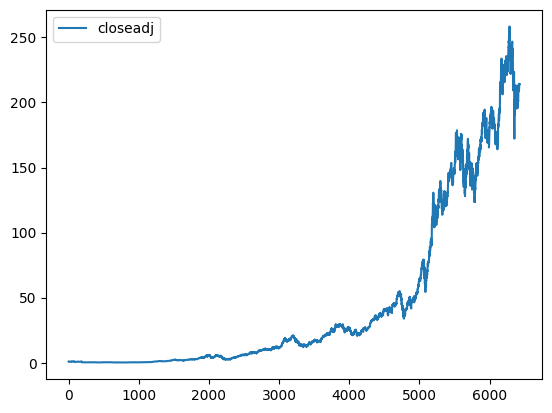

In [ ]:
df.plot()